# **Predictive Analytics**

# **Data understanding**

Dataset :Milk Quality Prediction Dataset from : https://www.kaggle.com/code/marcostrindade/milk-quality-prediction


In [56]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [57]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [58]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


**Data Loading**

In [59]:
!kaggle datasets download -d cpluzshrijayan/milkquality

  0% 0.00/1.24k [00:00<?, ?B/s]
100% 1.24k/1.24k [00:00<00:00, 186kB/s]


In [60]:
!unzip \*.zip  && rm *.zip

Archive:  milkquality.zip
replace milknew.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**Import Library**

In [61]:
# Data analysis imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


In [62]:
# load the datase
data_path = "/content/gdrive/MyDrive/Kaggle/milknew.csv"
milk = pd.read_csv(data_path)
milk

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


**Keterangan :**
Output dari kode diatas memberikan informasi sebagai berikut :
*   Terdapat 1059 baris dalam dataset
*   dan terdapat 8 kolom yaitu pH, Temprature,Taste, Odor,	Fat,	Turbidity,	Colour,	Grade.

**Exploratory Data Analysis - Deskripsi Variabel**

Exploratory data analysis (EDA) merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

Deskripsi Variabel

Pengecekan informasi variabel dari dataset yaitu jumlah kolom, nama kolom, jumlah data per kolom dann tipe datanya. dengan fitur info ()

In [63]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


**Keterangan :**

Output dari kode diatas memberikan informasi sebagai berikut :

*   Terdapat 1 kolom dengan tipe data object yaitu: Grade
*   Terdapat 6 kolom dengan tipe data Int46 yaitu: Temprature,Taste, Odor,	Fat,	Turbidity,	Colour,	Grade.
*   Terdapat 6 kolom dengan tipe data float yaitu ph.

* Fitur Grade merupakan target fitur dalam case kali ini.






Deskripsi Statistik
Mengecek deskripsi statistik data dengan fitur describe ()

In [64]:
milk.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


Berdasarkan output diatas, didapatkan deskripsi statistik yaitu :

1. count : Jumlah sampel data
2. mean : Nilai rata-rata
3. std : Standar deviasi
4. min : Nilai minimum
5. 25% : Kuartil bawah/Q1
6. 50% : Kuartil tengah/Q2/median
7. 75% : Kuartil atas/Q3
8. max : Nilai maksimum

## **Exploratory Data Analysis - Menangani Missing Value dan Outliers**

### **Menangani Missing Value**

In [65]:
milk.isnull().sum() 

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

Dari output isnull().sum() terlihat bahwa setiap fitur tidak memiliki nilai NULL maupun NAN sehingga sekarang kita bisa lanjutkan ke tahapan selanjutnya yaitu menangani outliers.

## **Menangani Outliers**

Pada kasus ini, kita akan mendeteksi outliers dengan teknis visualisasi data (boxplot). Kemudian kita akan menangani outliers dengan metode IQR.

Sekarang, mari kita lakukan visualisasi pada fitur numerik.

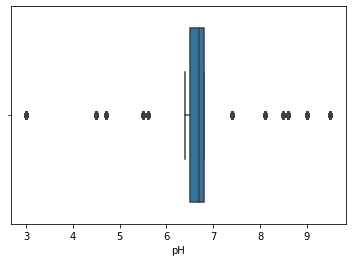

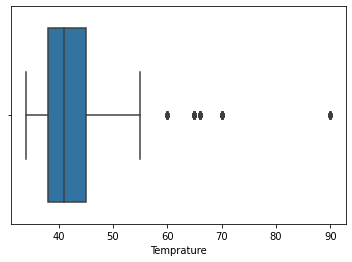

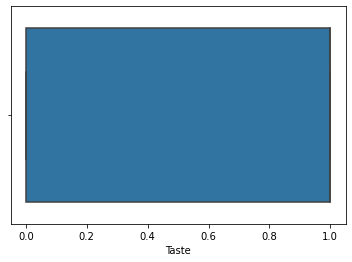

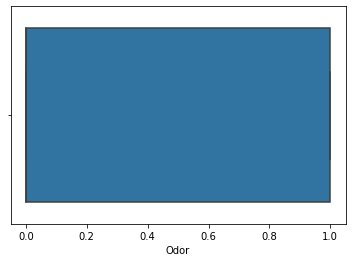

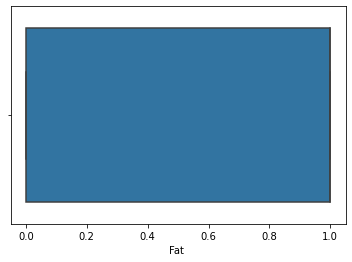

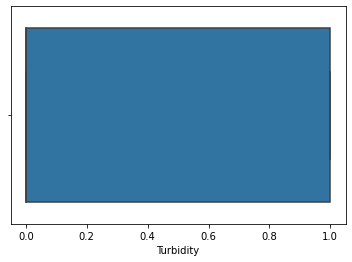

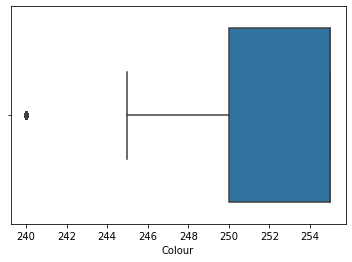

In [66]:
for fitur in milk.keys():
  # Selain target dan Id
  if fitur=='Grade' or fitur=='Id':
    continue
  sns.boxplot(x=milk[fitur])
  plt.show()

dari output diatas menunjukan bahwa terdapat missing value pada data Ph dan tempratur.

### **Menggunakan Metode IQR untuk menanganin Outlier**

In [67]:
Q1 = milk.quantile(0.25)
Q3 = milk.quantile(0.75)
IQR=Q3-Q1
milk=milk[~((milk<(Q1-1.5*IQR))|(milk>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
milk.shape

<ipython-input-67-92cd742b536c>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  milk=milk[~((milk<(Q1-1.5*IQR))|(milk>(Q3+1.5*IQR))).any(axis=1)]


(648, 8)

Sebelum proses menghilangkan outlier, ukuran dataset adalah (1059, 8) Setelah proses menghilangkan outlier, ukuran dataset adalah (648, 8) Banyak outlier yang dibersihkan sebanyak 1059 - 548 = 511(baris atau sampel). Kita akan cek kembali dengan boxplot setelah membersihkan outlier.

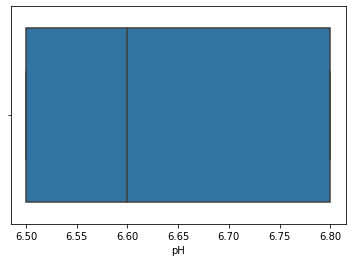

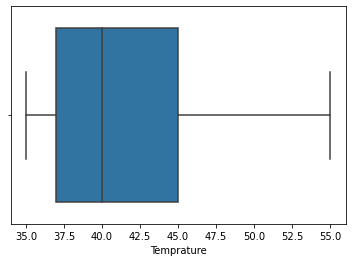

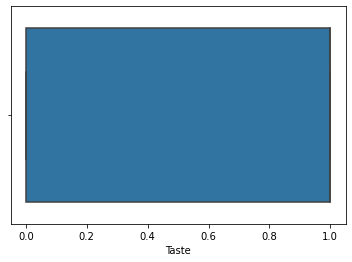

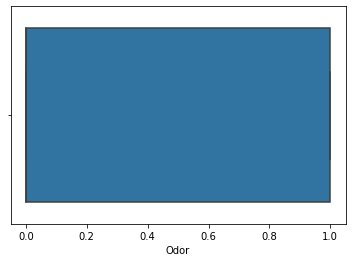

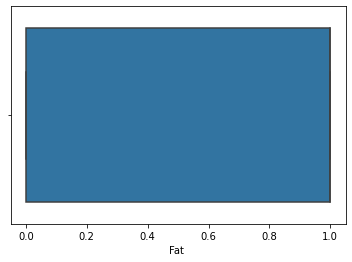

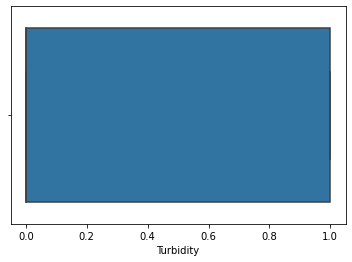

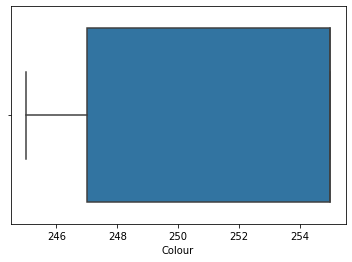

In [68]:
for fitur in milk.keys():
  # Selain target dan Id
  if fitur=='Grade' or fitur=='Id':
    continue
  sns.boxplot(x=milk[fitur])
  plt.show()

data sudah bersih dari Outliers

In [69]:
#encode 
milk['Grade'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace=True)

x = milk.drop(columns=['Grade'])
y = milk['Grade']

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### **Exploratory Data Analysis - Univariate Analysis**

melakukan proses analisis data dengan teknik Univariate EDA.
dengan cara bagi menjadi dua bagian, yaitu **numerical features dan categorical features.**

In [70]:
numerical_features = ['Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour', 'Grade']
categorical_features = ['pH']

## **Categorical Features**

     jumlah sampel  persentase
6.8            219        33.8
6.5            189        29.2
6.6            158        24.4
6.7             82        12.7


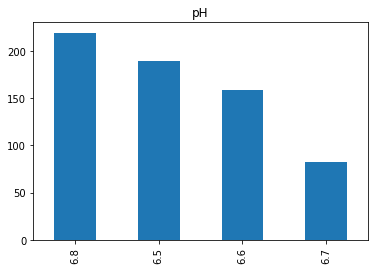

In [71]:
feature = categorical_features[0]
count = milk[feature].value_counts()
percent = 100*milk[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);


# **Numerical Features**


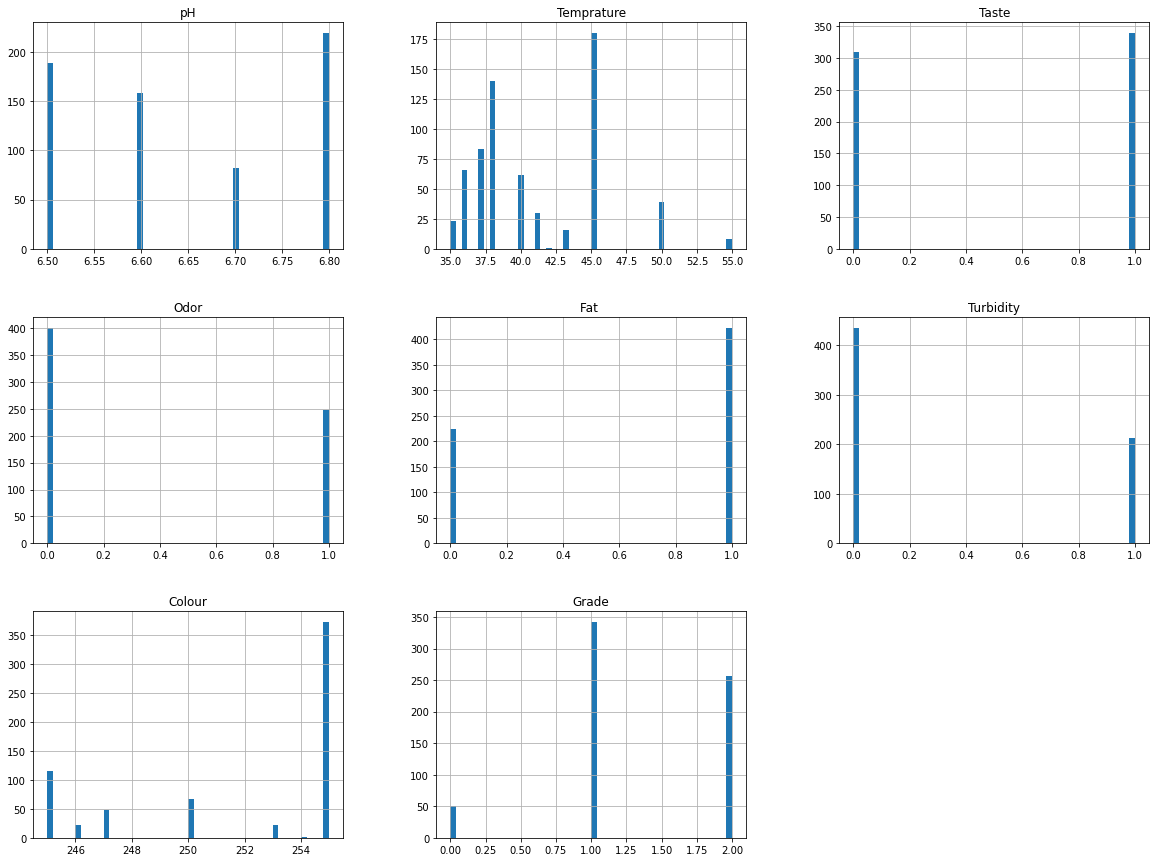

In [72]:
milk.hist(bins=50, figsize=(20,15))
plt.show()

# **Multivariate Analysis**

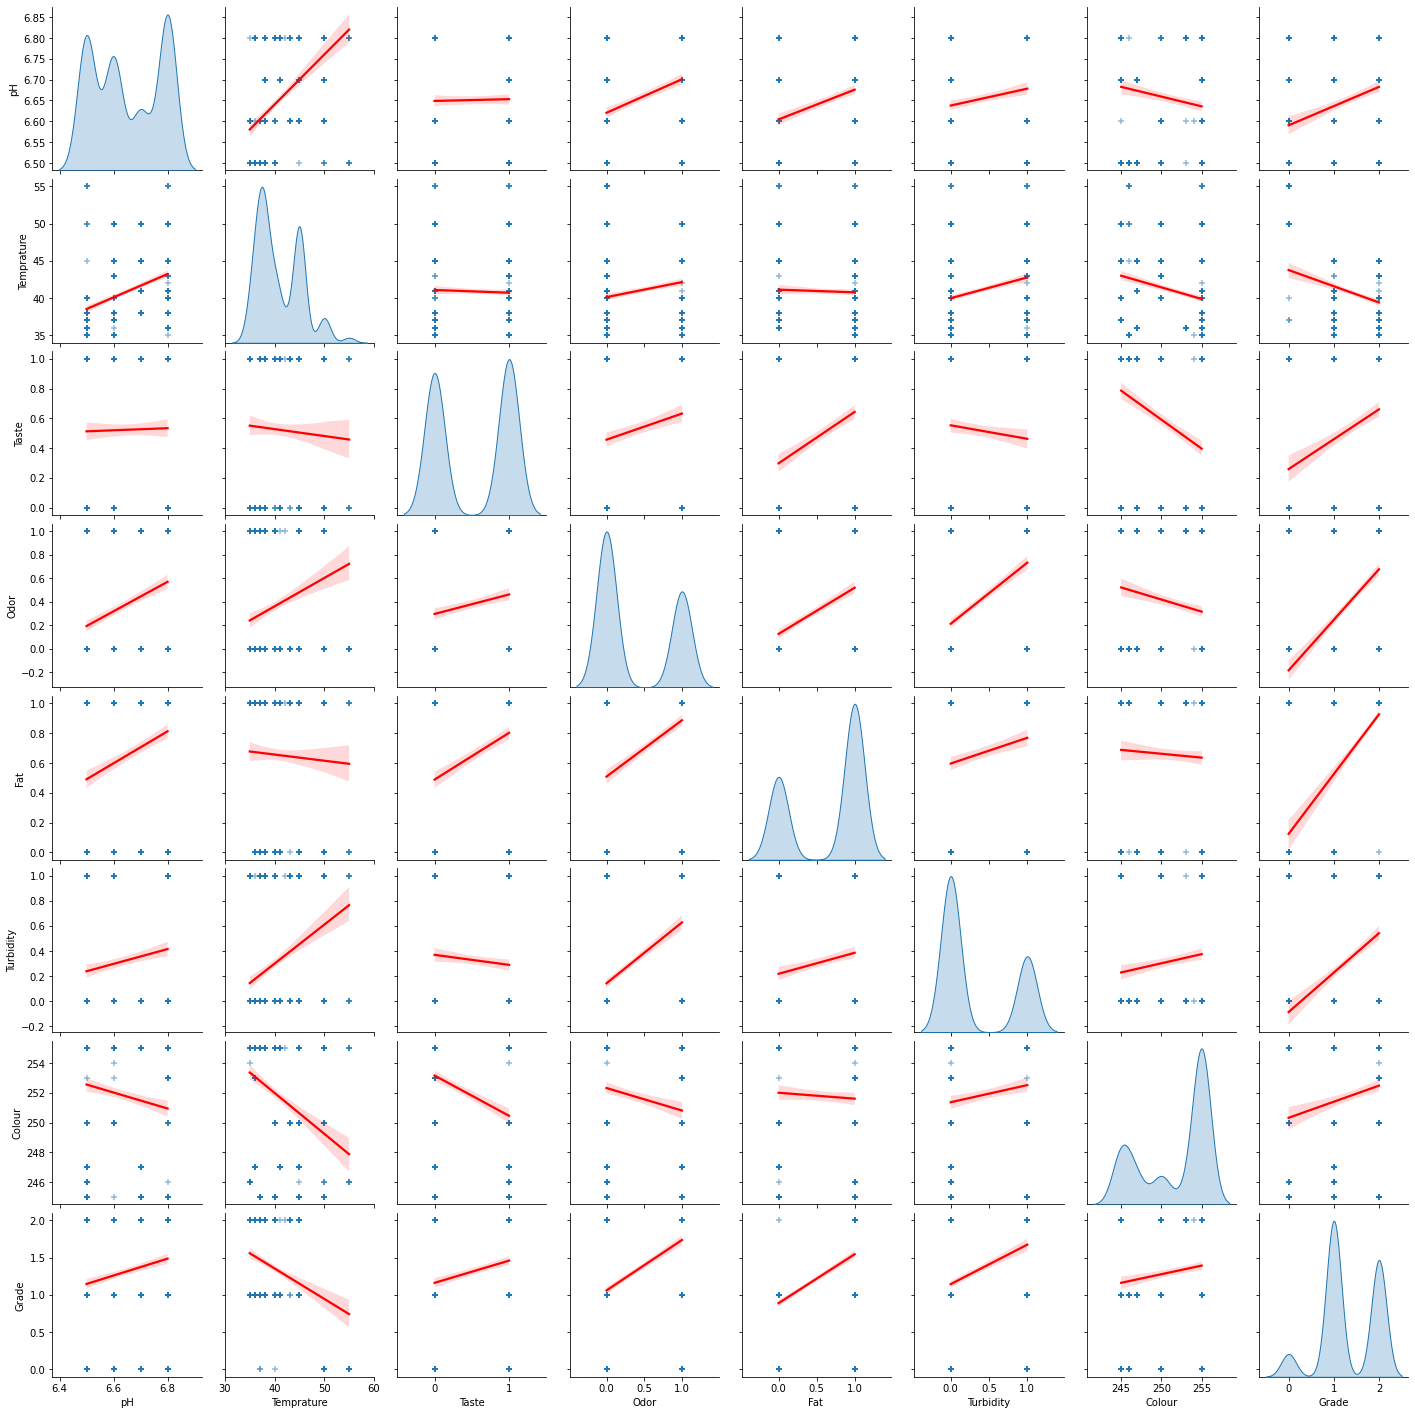

In [73]:
sns.pairplot(milk,
             kind="reg",
             markers="+",
             diag_kind='kde',
             plot_kws={'line_kws': {'color':'red'},
                       'scatter_kws': {'alpha': 0.5}})

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

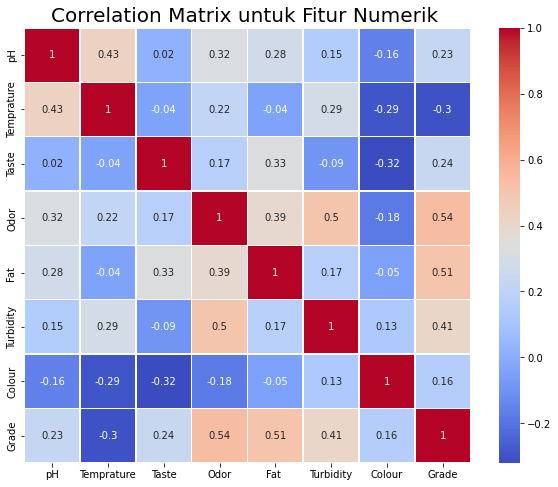

In [74]:
plt.figure(figsize=(10, 8))
correlation_matrix = milk.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Koefisien korelasi berkisar antara -1 dan +1. Semakin dekat nilainya ke 1 atau -1, maka korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0 maka korelasinya semakin lemah.

Dari grafik korelasi di atas, pH, Temprature, Odor, Fat, Grade memiliki korelasi yang kuat (mendekati -1, dibawah -0.85) dengan fitur target auqlity. Sementara itu,Taste, Turbidity, dan Colour mempunyai korelasi yang rendah.

In [75]:
pd.DataFrame(milk.groupby("Odor")["Turbidity"].mean())

,Turbidity
Odor,
0,0.142145
1,0.627530


dapat disimpulkan bahwa susu berbau tidak sedap memiliki kekeruhan yang cukup rendah dan sebaliknya untuk susu berbau harum!

### **Menemukan Suhu optimal di mana fitur utama Susu baik?**

In [76]:
pd.DataFrame(milk.groupby("Temprature")["Taste","Odor","Turbidity"].mean())

<ipython-input-76-dab3fa4f0645>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(milk.groupby("Temprature")["Taste","Odor","Turbidity"].mean())


,Taste,Odor,Turbidity
Temprature,,,
35,0.652174,0.347826,0.347826
36,0.000000,0.333333,0.015152
37,0.457831,0.289157,0.289157
38,0.742857,0.171429,0.171429
40,0.951613,0.306452,0.322581
41,0.266667,0.033333,0.000000
42,1.000000,1.000000,1.000000
43,0.875000,0.000000,0.625000
45,0.477778,0.783333,0.600000


Dari Dataframe yang diberikan kita dapat menyimpulkan bahwa 42 C sebagai suhu optimal di mana bau susunya enak dan juga rasanya!

Apakah pH yang lebih tinggi memastikan kita memiliki rasa susu yang lebih enak?

In [77]:
pd.DataFrame(milk.groupby("pH")["Taste","Odor"].mean())

<ipython-input-77-7d632a6bcf3b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(milk.groupby("pH")["Taste","Odor"].mean())


,Taste,Odor
pH,,
6.5,0.518519,0.142857
6.6,0.386076,0.360759
6.7,1.000000,0.609756
6.8,0.447489,0.515982


dapat didsimpulkan dari Kerangka Data yang diberikan bahwa itu tidak diperlukan tetapi pada saat yang sama susu tidak boleh memiliki nilai pH rendah.

### **Memiliki kandungan lemak yang lebih tinggi membuat rasa susu lebih enak ?**

In [78]:
pd.DataFrame(milk.groupby('Fat ')['Taste'].mean())

,Taste
Fat,
0,0.297778
1,0.643026


Tampaknya kandungan lemak yang lebih tinggi dalam susu memang membuat rasa susu lebih enak

# **Encoding the target variable**

In [79]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
milk['Grade']= label_encoder.fit_transform(milk['Grade'])

<ipython-input-79-781e597d16d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milk['Grade']= label_encoder.fit_transform(milk['Grade'])


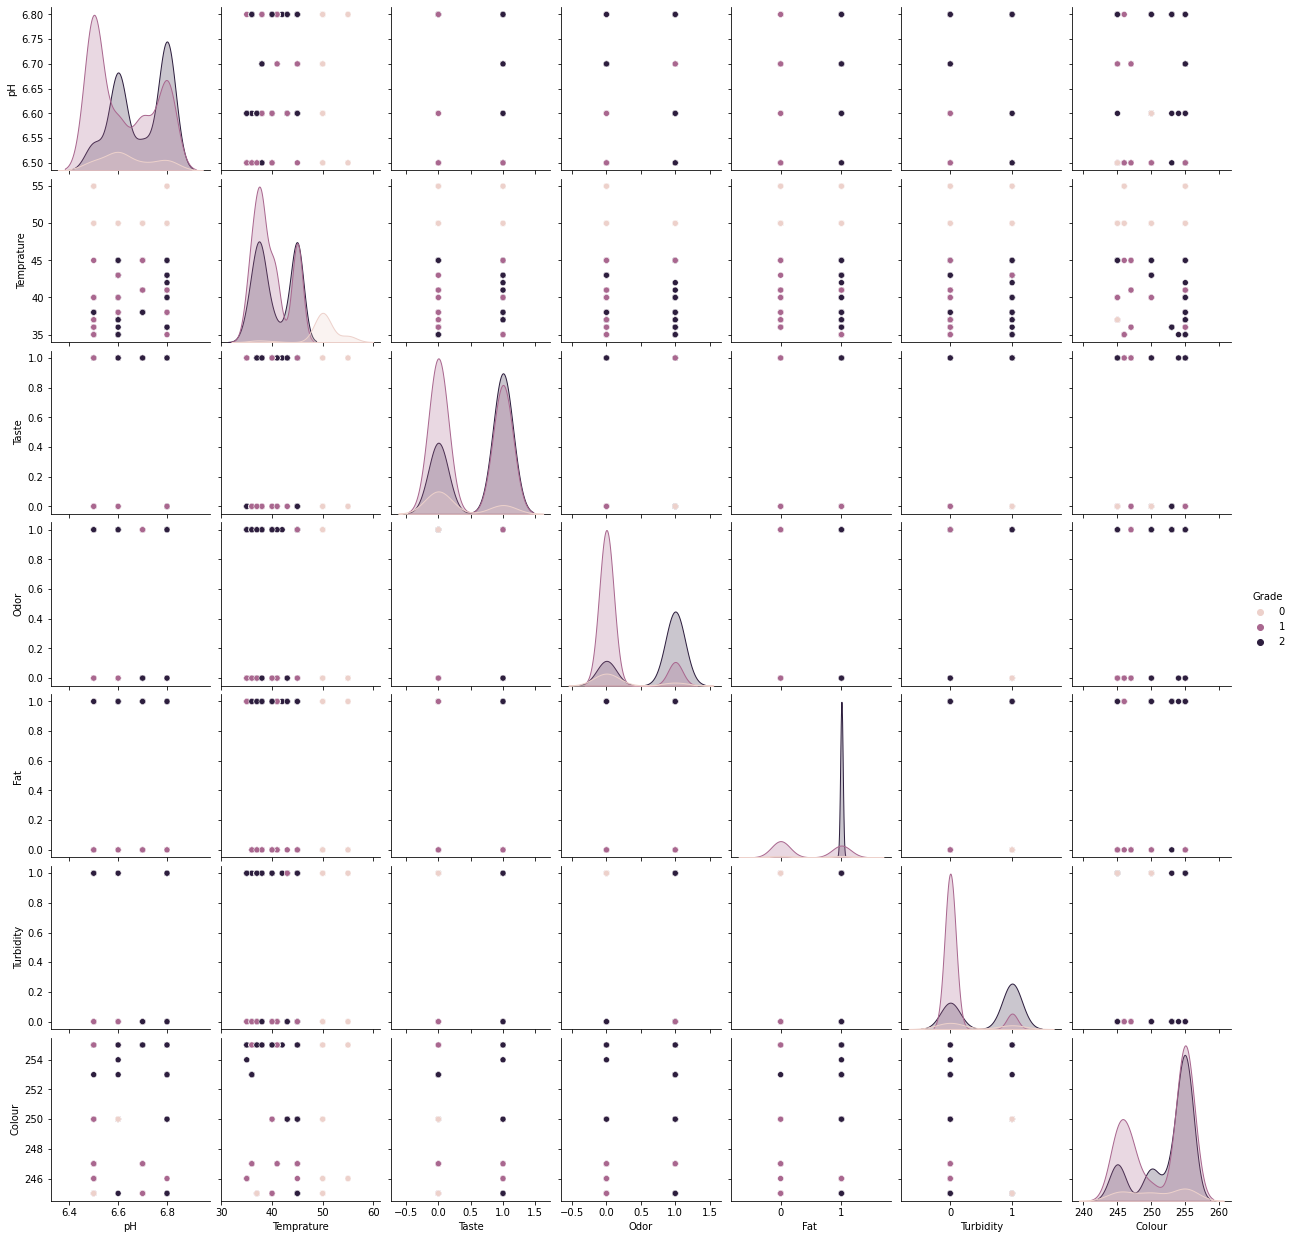

In [80]:
p = sns.pairplot(milk,hue="Grade")
plt.show()

### **Reduksi dimensi dengan Principal Component Analysis (PCA).**
PCA umumnya digunakan ketika variabel dalam data yang memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang atau redundant. Sebelumnya kita perlu cek kembali korelasi antar fitur dengan menggunakan pairplot.

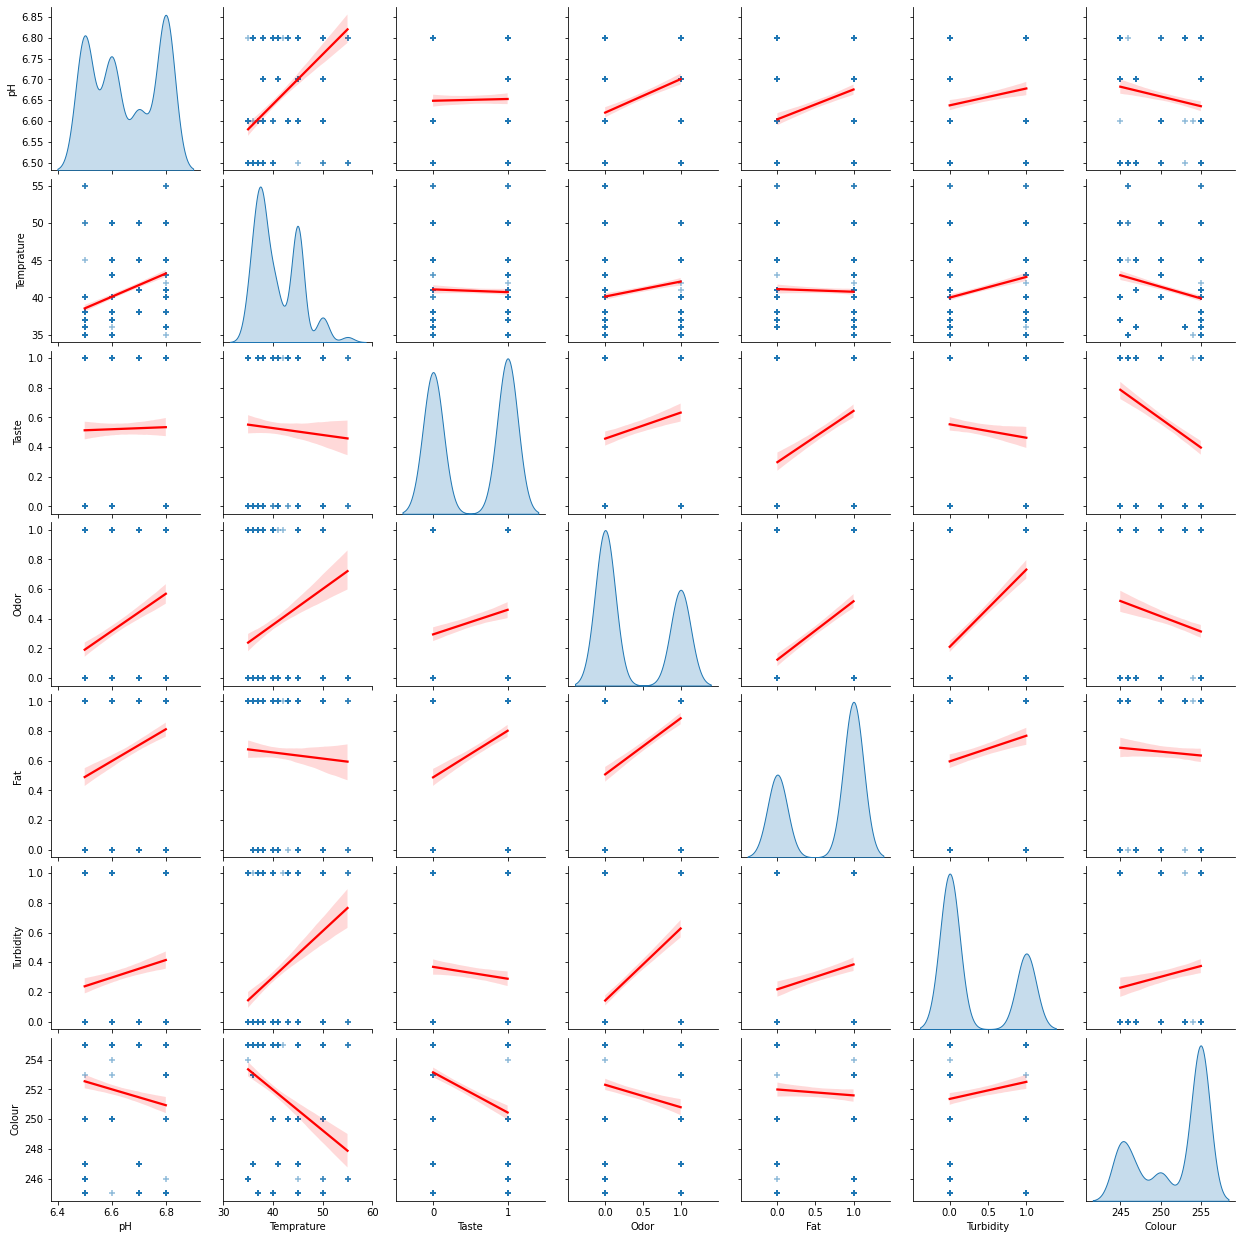

In [81]:
sns.pairplot(milk.loc[:, milk.columns != 'Grade'],
             kind="reg",
             markers="+",
             diag_kind='kde',
             plot_kws={'line_kws': {'color':'red'},
                       'scatter_kws': {'alpha': 0.5}})

Selanjutnya kita akan mereduksi 4 komponen Temprature, Taste, Odor,Turbidity, Colour karena berkorelasi kuat yang dapat dilihat pada visualisasi pairplot di atas.

In [82]:
pca = PCA(n_components=4, random_state=123)
pca.fit(milk[['Temprature', 'Taste', 'Odor','Turbidity', 'Colour']])
princ_comp = pca.transform(milk[['Temprature', 'Taste', 'Odor', 'Turbidity', 'Colour']])

Setelah menerapkan class PCA dengan n_components sebanyak fitur yang dikenakan PCA, kita bisa mengetahui proporsi informasi dari kedua komponen hasil PCA sebagai berikut:

In [83]:
pca.explained_variance_ratio_.round(3)

array([0.638, 0.345, 0.008, 0.006])

Arti dari output di atas adalah, 63,8% informasi pada keempat fitur citric acid, fixed acidity, volatile acidity dan pH terdapat pada PC (Principal Component) pertama. Sedangkan sisanya sebesar 34,5%, 0,8% dan 0,6% terdapat pada PC kedua.

Berdasarkan hasil tersebut, kita akan mereduksi fitur dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur yang menggantikan keempat fitur lainnya. Kita beri nama fitur ini CFVP.

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(milk[['Temprature', 'Taste', 'Odor','Turbidity', 'Colour']])
milk['CFVP'] = pca.transform(milk.loc[:, ('Temprature', 'Taste', 'Odor','Turbidity', 'Colour')]).flatten()
milk.drop(['Temprature', 'Taste', 'Odor','Turbidity', 'Colour'], axis=1, inplace=True)

<ipython-input-84-e40345cbb140>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milk['CFVP'] = pca.transform(milk.loc[:, ('Temprature', 'Taste', 'Odor','Turbidity', 'Colour')]).flatten()
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [85]:
milk.head()

,pH,Fat,Grade,CFVP
0,6.6,1,2,-6.018179
1,6.6,0,2,-4.589372
4,6.6,0,1,-5.099167
5,6.6,1,2,-5.045992
9,6.7,0,1,6.181003


### **Pembagian dataset dengan fungsi train_test_split dari library sklearn**

Kita akan membagi dataset menjadi data latih (train) dan data uji (test). Tujuan langkah ini sebelum proses lainnya adalah agar kita tidak mengotori data uji dengan informasi yang kita dapat dari data latih. Contoh pada proses standarisasi dimana jika belum di bagi menjadi data latih dan uji, maka keduanya akan terkena transformasi data yang menggunakan informasi (mean dan standard deviation) dari gabungan data latih dan uji. Hal ini berpotensi menimbulkan kebocoran data (data leakage). Oleh karena itu langkah awal sebelum melakukan tranformasi data adalah membagi dataset terlebih dahulu.

Pada kasus ini kita akan menggunakan proporsi pembagian sebesar 90:10 dengan fungsi train_test_split dari sklearn.

In [86]:
X = milk.drop(["Grade"],axis =1)
y = milk["Grade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)
     

In [87]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 648
Total # of sample in train dataset: 583
Total # of sample in test dataset: 65


### **Standarisasi**

Proses standarisasi bertujuan untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn.

Standard Scaler melakukan proses standarisasi fitur dengan mengurangkan mean kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandarScaler menghasilkan distribusi deviasi sama dengan 1 dan mean sama dengan 0.



In [89]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['CFVP']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,CFVP
789,0.258824
265,-1.192153
1050,-1.019936
601,1.560484
672,1.560484


In [90]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

### **Model Development**

Pada tahap ini, kita akan menggunakan tiga algoritma untuk kasus regresi ini. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menetukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

- K-Nearest Neighbor
Kelebihan algoritma KNN adalah mudah dipahami dan digunakan sedangkan kekurangannya kika dihadapkan pada jumlah fitur atau dimensi yang besar rawan terjadi bias.

- Random Forest
Kelebihan algoritma Random Forest adalah menggunakan teknik Bagging yang berusaha melawan overfitting dengan berjalan secara paralel. Sedangkan kekurangannya ada pada kompleksitas algoritma Random Forest yang membutuhkan waktu relatif lebih lama dan daya komputasi yang lebih tinggi dibanding algoritma seperti Decision Tree.

- Boosting Algorithm
Kelebihan algoritma Boosting adalah menggunakan teknik Boosting yang berusaha menurunkan bias dengan berjalan secara sekuensial (memperbaiki model di tiap tahapnya). Sedangkan kekurangannya hampir sama dengan algoritma Random Forest dari segi kompleksitas komputasi yang menjadikan waktu pelatihan relatif lebih lama, selain itu noisy dan outliers sangat berpengaruh dalam algoritma ini.

Untuk langkah pertama, kita akan siapkan DataFrame baru untuk menampung nilai metrik (MSE - Mean Squared Error) pada setiap model / algoritma. Hal ini berguna untuk melakukan analisa perbandingan antar model.

In [ ]:
# Siapkan dataframe untuk analisis model
df_models = pd.DataFrame(index=['Train MSE', 'Test MSE'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

**K-Nearest Neighbor**

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih k tetangga terdekat. Pemilihan nilai k sangat penting dan berpengaruh terhadap performa model. Jika kita memilih k yang terlalu rendah, maka akan menghasilkan model yang overfitting dan hasil prediksinya memiliki varians tinggi. Jika kita memilih k yang terlalu tinggi, maka model yang dihasilkan akan underfitting dan prediksinya memiliki bias yang tinggi 

Oleh karena itu, kita akan mencoba beberapa nilai k yang berbeda (1 sampai 20) kemudian membandingan mana yang menghasilkan nilai metrik model (pada kasus ini kita pakai mean squared error) terbaik. Selain itu, kita akan menggunakan metrik ukuran jarak secara default (Minkowski Distance) pada library sklearn.



In [ ]:
list_mse = []
for k in range(1, 21):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_prediction = knn.predict(X_test)
  test_mse = mean_squared_error(y_test, y_prediction)
  list_mse.append(test_mse)
  print(f"Nilai MSE untuk k = {k} adalah : {test_mse}")

In [ ]:
pd.DataFrame(list_mse, index=range(1, 21)).plot(
    xlabel="K",
    ylabel="MSE",
    legend=False,
    xticks=range(1,21), 
    figsize=(12,4),
    title='Visualisasi Nilai K terhadap MSE')

In [ ]:
KNN = KNeighborsRegressor(n_neighbors=6)
KNN.fit(X_train, y_train)
df_models.loc['Train MSE', 'KNN'] = mean_squared_error(
    y_pred=KNN.predict(X_train),
    y_true=y_train)

**Random Forest**

Random forest merupakan algoritma supervised learning yang termasuk ke dalam kategori ensemble (group) learning. Pada model ensemble, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model ensemble ini digabungkan untuk membuat prediksi akhir. Jenis metode ensemble yang digunakan pada Random Forest adalah teknik Bagging. Metode ini bekerja dengan membuat subset dari data train yang independen. Beberapa model awal (base model / weak model) dibuat untuk dijalankan secara simultan / paralel dan independen satu sama lain dengan subset data train yang independen. Hasil prediksi setiap model kemudian dikombinasikan untuk menentukan hasil prediksi final.

Kita akan menggunakan RandomForestRegressor dari library scikit-learn dengan base_estimator defaultnya yaitu DecisionTreeRegressor dan parameter-parameter (hyperparameter) yang digunakan antara lain:

n_estimator: jumlah trees (pohon) di forest. max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan. random_state: digunakan untuk mengontrol random number generator yang digunakan. n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

Untuk menentukan nilai hyperparameter (n_estimator & max_depth) di atas, kita akan melakukan tuning dengan GridSearchCV. Keuntungan utama dari Grid Search adalah akurasi pembelajaran yang tinggi dan kemampuan pemrosesan paralel pada pelatihan setiap SVM, karena independen satu sama lain.

In [ ]:
params_rf = {
    "n_estimators": np.arange(10, 100, 10), # kelipatan 10 mulai dari 10 sampai 90
    "max_depth": [4, 8, 16, 32]
}

# Grid search model
gs_model = GridSearchCV(
    estimator=RandomForestRegressor(n_jobs=-1, random_state=123),
    param_grid=params_rf,
    # Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scoring='neg_mean_squared_error', # Negatif dari nilai MSE
    verbose=3
)

gs_model.fit(X_train, y_train)


In [ ]:
print("Hasil tuning hyperparameter", gs_model.best_params_)

print("Nilai MSE model GridSearchCV_RF dengan data latih", mean_squared_error(
    y_pred=gs_model.predict(X_train),
    y_true=y_train))
print("Nilai MSE model GridSearchCV_RF dengan data uji", mean_squared_error(
    y_pred=gs_model.predict(X_test),
    y_true=y_test))

Dari hasil output di atas diperoleh nilai MSE terbaik dalam jangkauan parameter params_rf yaitu 0.00170 (dengan data train) dan 0.004222 (dengan data test) dengan n_estimators: 30 dan max_depth: 16. Selanjutnya kita akan menggunakan pengaturan parameter tersebut dan menyimpan nilai MSE nya kedalam df_models yang telah kita siapkan sebelumnya.

In [ ]:

RF = RandomForestRegressor(n_estimators=30, max_depth=16)
RF.fit(X_train, y_train)

df_models.loc['Train MSE', 'RandomForest'] = mean_squared_error(
    y_pred=RF.predict(X_train),
    y_true=y_train)


**Boosting Algorithm**

Jika sebelumnya kita menggunakan algoritma bagging (Random Forest). Selanjutnya kita akan menggunakan metode lain dalam model ensemble yaitu teknik Boosting. Algoritma Boosting bekerja dengan membangun model dari data train. Kemudian membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan. Teknik ini bekerja secara sekuensial.

Pada kasus ini kita akan menggunakan metode Adaptive Boosting. Untuk implementasinya kita menggunakan AdaBoostRegressor dari library sklearn dengan base_estimator defaultnya yaitu DecisionTreeRegressor hampir sama dengan RandomForestRegressor bedanya menggunakan metode teknik Boosting.

Parameter-parameter (hyperparameter) yang digunakan pada algoritma ini antara lain:

n_estimator: jumlah estimator dan ketika mencapai nilai jumlah tersebut algoritma Boosting akan dihentikan. learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing iterasi Boosting. random_state: digunakan untuk mengontrol random number generator yang digunakan. Untuk menentukan nilai hyperparameter (n_estimator & learning_rate) di atas, kita akan melakukan tuning dengan GridSearchCV.

In [ ]:

params_ab = {
    "n_estimators": np.arange(10, 100, 10), # kelipatan 10 mulai dari 10 sampai 90
    "learning_rate": [0.001, 0.01, 0.1, 0.2]
}

# Grid search model
gs_model_ab = GridSearchCV(
    estimator=AdaBoostRegressor(random_state=123),
    param_grid=params_ab,
    # Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scoring='neg_mean_squared_error', # Negatif dari nilai MSE
    verbose=3
)

gs_model_ab.fit(X_train, y_train)

In [ ]:
print("Hasil tuning hyperparameter", gs_model_ab.best_params_)

# AB = AdaBoosting
print("Nilai MSE model GridSearchCV_AB dengan data latih", mean_squared_error(
    y_pred=gs_model_ab.predict(X_train),
    y_true=y_train))
print("Nilai MSE model GridSearchCV_AB dengan data uji", mean_squared_error(
    y_pred=gs_model_ab.predict(X_test),
    y_true=y_test))


Dari hasil output di atas diperoleh nilai MSE terbaik dalam jangkauan parameter params_ab yaitu 0.12533 (dengan data train) dan 0.14574 (dengan data test) dengan n_estimators: 60 dan learning_rate: 0.2. Selanjutnya kita akan menggunakan pengaturan parameter tersebut dan menyimpan nilai MSE nya kedalam df_models yang telah kita siapkan sebelumnya.

In [ ]:
boosting = AdaBoostRegressor(n_estimators=90, learning_rate=0.2)
boosting.fit(X_train, y_train)

df_models.loc['Train MSE', 'Boosting'] = mean_squared_error(
    y_pred=boosting.predict(X_train),
    y_true=y_train)
     

Evaluasi
Dari proses sebelumnya, kita telah membuat tiga model yang berbeda dan juga telah melatihnya. Selanjutnya kita perlu mengevaluasi model-model tersebut menggunakan data uji dan metrik yang digunakan dalam kasus ini yaitu mean_squared_error. Hasil evaluasi kemudian kita simpan ke dalam df_models.

In [ ]:
for name, model in {'KNN': KNN, 'RandomForest': RF, 'Boosting': boosting}.items():
  df_models.loc['Test MSE', name] = mean_squared_error(
      y_pred=model.predict(X_test),
      y_true=y_test)
  
# Mengecek evaluasi model
display(df_models)

In [ ]:
fig, ax = plt.subplots()
df_models.T.sort_values(by='Test MSE', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model RandomForest memberikan nilai eror (MSE) yang paling kecil. Sedangkan model algoritma Boosting memiliki eror yang paling besar. Sebelum memutuskan model terbaik untuk melakukan prediksi Kualitas pada Susu atau besarnya daya yang dihasilkan. Mari kita coba uji prediksi menggunakan beberapa sampel acak (5) pada data uji.

In [ ]:

dict_result = {
    'index_sample': [],
    'y_true': [],
    'prediksi_KNN': [],
    'prediksi_RF': [],
    'prediksi_Boosting': []
}

X_sample = X_test.sample(5)
dict_result['index_sample'] = X_sample.index.values
dict_result['y_true'] = [pd.DataFrame(y_test).loc[idx, 'Grade'] for idx in dict_result['index_sample']]

for name, model in {'KNN': KNN, 'RF': RF, 'Boosting': boosting}.items():
  dict_result['prediksi_' + name] = model.predict(X_sample)

display(pd.DataFrame(dict_result).set_index('index_sample'))


Terlihat bahwa prediksi dengan K-Nearest Neighbor dan Random Forest memberikan hasil yang sama.

# **Kesimpulan**
Berdasarkan hasil evaluasi model di atas, dapat disimpulkan bahwa model terbaik untuk melakukan prediksi Kualitas Susu adalah Model RandomForest pada Data Latih dengan nilai 0.050118 dan Model terbaik pada Data Uji yaitu Model K-Nearest Neighbor dengan nilai 0.062393. Diharapkan dengan dibangunnya model ini dapat menjadi pedoman perusahaan dalam menentukan kualitas Susu yang berdampak pada kenaikan pendapatan.